### Import Necessary Packages

In [32]:
import gc
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn import preprocessing, metrics
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)


### Define Utility Functions 
* reduce memory usage 
* read data 

In [33]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [34]:
def read_data():
    print('Reading files...')
    calendar = pd.read_csv('calendar.csv')
    calendar = reduce_mem_usage(calendar)
    print('Calendar has {} rows and {} columns'.format(calendar.shape[0], calendar.shape[1]))
    sell_prices = pd.read_csv('sell_prices.csv')
    sell_prices = reduce_mem_usage(sell_prices)
    print('Sell prices has {} rows and {} columns'.format(sell_prices.shape[0], sell_prices.shape[1]))
    item_demands = pd.read_csv('sales_train_validation.csv')
    print('Sales train validation has {} rows and {} columns'.format(item_demands.shape[0], item_demands.shape[1]))
    return calendar, sell_prices, item_demands

### Show 3 Tables 
* calendar 
* sell prices 
* item demands per day 

In [35]:
calendar, sell_prices, item_demands  = read_data()

Reading files...
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Sales train validation has 30490 rows and 1919 columns


In [36]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [37]:
sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.578125
1,CA_1,HOBBIES_1_001,11326,9.578125
2,CA_1,HOBBIES_1_001,11327,8.257812
3,CA_1,HOBBIES_1_001,11328,8.257812
4,CA_1,HOBBIES_1_001,11329,8.257812


In [38]:
item_demands.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,d_45,d_46,d_47,d_48,d_49,d_50,d_51,d_52,d_53,d_54,d_55,d_56,d_57,d_58,d_59,d_60,d_61,d_62,d_63,d_64,d_65,d_66,d_67,d_68,d_69,d_70,d_71,d_72,d_73,d_74,d_75,d_76,d_77,d_78,d_79,d_80,d_81,d_82,d_83,d_84,d_85,d_86,d_87,d_88,d_89,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99,d_100,d_101,d_102,d_103,d_104,d_105,d_106,d_107,d_108,d_109,d_110,d_111,d_112,d_113,d_114,d_115,d_116,d_117,d_118,d_119,d_120,d_121,d_122,d_123,d_124,d_125,d_126,d_127,d_128,d_129,d_130,d_131,d_132,d_133,d_134,d_135,d_136,d_137,d_138,d_139,d_140,d_141,d_142,d_143,d_144,d_145,d_146,d_147,d_148,d_149,d_150,d_151,d_152,d_153,d_154,d_155,d_156,d_157,d_158,d_159,d_160,d_161,d_162,d_163,d_164,d_165,d_166,d_167,d_168,d_169,d_170,d_171,d_172,d_173,d_174,d_175,d_176,d_177,d_178,d_179,d_180,d_181,d_182,d_183,d_184,d_185,d_186,d_187,d_188,d_189,d_190,d_191,d_192,d_193,d_194,d_195,d_196,d_197,d_198,d_199,d_200,d_201,d_202,d_203,d_204,d_205,d_206,d_207,d_208,d_209,d_210,d_211,d_212,d_213,d_214,d_215,d_216,d_217,d_218,d_219,d_220,d_221,d_222,d_223,d_224,d_225,d_226,d_227,d_228,d_229,d_230,d_231,d_232,d_233,d_234,d_235,d_236,d_237,d_238,d_239,d_240,d_241,d_242,d_243,d_244,...,d_1664,d_1665,d_1666,d_1667,d_1668,d_1669,d_1670,d_1671,d_1672,d_1673,d_1674,d_1675,d_1676,d_1677,d_1678,d_1679,d_1680,d_1681,d_1682,d_1683,d_1684,d_1685,d_1686,d_1687,d_1688,d_1689,d_1690,d_1691,d_1692,d_1693,d_1694,d_1695,d_1696,d_1697,d_1698,d_1699,d_1700,d_1701,d_1702,d_1703,d_1704,d_1705,d_1706,d_1707,d_1708,d_1709,d_1710,d_1711,d_1712,d_1713,d_1714,d_1715,d_1716,d_1717,d_1718,d_1719,d_1720,d_1721,d_1722,d_1723,d_1724,d_1725,d_1726,d_1727,d_1728,d_1729,d_1730,d_1731,d_1732,d_1733,d_1734,d_1735,d_1736,d_1737,d_1738,d_1739,d_1740,d_1741,d_1742,d_1743,d_1744,d_1745,d_1746,d_1747,d_1748,d_1749,d_1750,d_1751,d_1752,d_1753,d_1754,d_1755,d_1756,d_1757,d_1758,d_1759,d_1760,d_1761,d_1762,d_1763,d_1764,d_1765,d_1766,d_1767,d_1768,d_1769,d_1770,d_1771,d_1772,d_1773,d_1774,d_1775,d_1776,d_1777,d_1778,d_1779,d_1780,d_1781,d_1782,d_1783,d_1784,d_1785,d_1786,d_1787,d_1788,d_1789,d_1790,d_1791,d_1792,d_1793,d_1794,d_1795,d_1796,d_1797,d_1798,d_1799,d_1800,d_1801,d_1802,d_1803,d_1804,d_1805,d_1806,d_1807,d_1808,d_1809,d_1810,d_1811,d_1812,d_1813,d_1814,d_1815,d_1816,d_1817,d_1818,d_1819,d_1820,d_1821,d_1822,d_1823,d_1824,d_1825,d_1826,d_1827,d_1828,d_1829,d_1830,d_1831,d_1832,d_1833,d_1834,d_1835,d_1836,d_1837,d_1838,d_1839,d_1840,d_1841,d_1842,d_1843,d_1844,d_1845,d_1846,d_1847,d_1848,d_1849,d_1850,d_1851,d_1852,d_1853,d_1854,d_1855,d_1856,d_1857,d_1858,d_1859,d_1860,d_1861,d_1862,d_1863,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,2,0,2,2,0,0,0,1,1,0,2,0,1,1,2,0,1,0,0,0,2,1,0,1,1,2,0,0,0,0,0,0,0,1,0,1,0,1,0,3,1,1,0,1,1,2,0,0,0,0,1,1,0,0,0,0,3,0,1,0,0,0,0,1,1,1,0,1,0,2,0,0,0,0,2,0,0,0,0,1,1,2,0,0,0,0,2,0,0,1,1,1,1,0,0,0,0,0,1,2,2,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,3,0,1,2,1,0,3,0,0,0,1,0,2,2,1,0,0,1,2,0,1

In [39]:
foodproduct = item_demands[item_demands['cat_id']=='FOODS']
target_product = foodproduct['item_id'].unique()[:300]
item_demands = item_demands[(item_demands['item_id'].isin(target_product))]
sell_prices = sell_prices[(sell_prices['item_id'].isin(target_product))]

In [40]:
def melt_sales_train_days(item_demands):
    id_vars = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']
    value_vars = item_demands.columns[6:]
    item_demands = pd.melt(item_demands, id_vars = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], value_vars=value_vars, var_name = 'day', value_name = 'demand')
    item_demands = reduce_mem_usage(item_demands)
    return item_demands

In [41]:
item_demands_melt = melt_sales_train_days(item_demands)
item_demands_melt.head()

Mem. usage decreased to 317.44 Mb (9.4% reduction)


,id,item_id,dept_id,cat_id,store_id,state_id,day,demand
0,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_1,3
1,FOODS_1_002_CA_1_validation,FOODS_1_002,FOODS_1,FOODS,CA_1,CA,d_1,0
2,FOODS_1_003_CA_1_validation,FOODS_1_003,FOODS_1,FOODS,CA_1,CA,d_1,0
3,FOODS_1_004_CA_1_validation,FOODS_1_004,FOODS_1,FOODS,CA_1,CA,d_1,0
4,FOODS_1_005_CA_1_validation,FOODS_1_005,FOODS_1,FOODS,CA_1,CA,d_1,3


In [42]:
data = pd.merge(item_demands_melt, calendar, how = 'left', left_on = ['day'], right_on = ['d'])
data.drop(['d', 'day'], inplace = True, axis = 1)
data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,demand,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,3,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,FOODS_1_002_CA_1_validation,FOODS_1_002,FOODS_1,FOODS,CA_1,CA,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,FOODS_1_003_CA_1_validation,FOODS_1_003,FOODS_1,FOODS,CA_1,CA,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,FOODS_1_004_CA_1_validation,FOODS_1_004,FOODS_1,FOODS,CA_1,CA,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
4,FOODS_1_005_CA_1_validation,FOODS_1_005,FOODS_1,FOODS,CA_1,CA,3,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0


In [43]:
data = data.merge(sell_prices, on = ['store_id', 'item_id', 'wm_yr_wk'], how = 'left')
data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,demand,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,3,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,2.000000
1,FOODS_1_002_CA_1_validation,FOODS_1_002,FOODS_1,FOODS,CA_1,CA,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,7.878906
2,FOODS_1_003_CA_1_validation,FOODS_1_003,FOODS_1,FOODS,CA_1,CA,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,2.880859
3,FOODS_1_004_CA_1_validation,FOODS_1_004,FOODS_1,FOODS,CA_1,CA,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
4,FOODS_1_005_CA_1_validation,FOODS_1_005,FOODS_1,FOODS,CA_1,CA,3,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,2.939453


In [44]:
def transform(data):
    nan_features = ['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']
    for feature in nan_features:
        data[feature].fillna('unknown', inplace = True)
        
    cat = ['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']
    for feature in cat:
        encoder = preprocessing.LabelEncoder()
        data[feature] = encoder.fit_transform(data[feature].astype("str"))
    
    return data



In [47]:
transformed = transform(data)
transformed.head()

,id,item_id,dept_id,cat_id,store_id,state_id,demand,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,FOODS_1_001_CA_1_validation,0,0,0,0,0,3,2011-01-29,11101,Saturday,1,1,2011,30,4,4,2,0,0,0,2.000000
1,FOODS_1_002_CA_1_validation,1,0,0,0,0,0,2011-01-29,11101,Saturday,1,1,2011,30,4,4,2,0,0,0,7.878906
2,FOODS_1_003_CA_1_validation,2,0,0,0,0,0,2011-01-29,11101,Saturday,1,1,2011,30,4,4,2,0,0,0,2.880859
3,FOODS_1_004_CA_1_validation,3,0,0,0,0,0,2011-01-29,11101,Saturday,1,1,2011,30,4,4,2,0,0,0,NaN
4,FOODS_1_005_CA_1_validation,4,0,0,0,0,3,2011-01-29,11101,Saturday,1,1,2011,30,4,4,2,0,0,0,2.939453


In [48]:
data.corr()

,item_id,dept_id,cat_id,store_id,state_id,demand,wm_yr_wk,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
item_id,1.000000e+00,7.776932e-01,NaN,0.000000e+00,8.426342e-18,-0.033641,-7.947664e-18,9.146696e-22,7.787787e-18,3.881825e-21,-1.348941e-17,5.583516e-18,3.706644e-18,-1.666522e-20,-4.988856e-21,-4.988856e-21,-4.988856e-21,0.156352
dept_id,7.776932e-01,1.000000e+00,NaN,1.200029e-22,5.207333e-16,-0.029142,-2.186203e-17,2.022173e-16,2.661849e-16,9.760198e-16,5.489998e-17,-7.378822e-16,-1.190877e-17,3.439235e-17,-2.607701e-16,-2.607701e-16,-2.607701e-16,0.152867
cat_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_id,0.000000e+00,1.200029e-22,NaN,1.000000e+00,9.430419e-01,-0.029397,1.155778e-19,1.163454e-20,-1.931686e-21,3.601254e-20,-1.889438e-18,3.729419e-18,1.180164e-18,3.896125e-19,-3.693459e-18,-2.218397e-17,-1.848587e-17,0.028035
state_id,8.426342e-18,5.207333e-16,NaN,9.430419e-01,1.000000e+00,-0.022462,-6.432821e-16,2.104147e-14,-5.877916e-15,-4.381760e-15,-1.574069e-15,4.564955e-15,8.863047e-16,-2.171750e-16,-1.637306e-14,-1.637306e-14,-1.637306e-14,0.029377
demand,-3.364062e-02,-2.914216e-02,NaN,-2.939689e-02,-2.246228e-02,1.000000,4.575485e-02,-2.600994e-02,-3.154743e-03,4.566375e-02,6.661154e-03,5.346377e-03,-1.234249e-03,-1.201301e-03,1.265560e-02,1.944252e-02,2.034716e-02,-0.163195
wm_yr_wk,-7.947664e-18,-2.186203e-17,NaN,1.155778e-19,-6.432821e-16,0.045755,1.000000e+00,-2.378798e-03,-2.967611e-02,9.882097e-01,9.713754e-04,-1.700835e-03,1.502848e-02,1.124245e-02,-2.311742e-03,-5.143222e-04,-3.072122e-04,0.017178
wday,9.146696e-22,2.022173e-16,NaN,1.163454e-20,2.104147e-14,-0.026010,-2.378798e-03,1.000000e+00,-7.714578e-04,1.542631e-03,3.818674e-02,4.909251e-02,4.171106e-02,4.435961e-02,3.595006e-04,3.595006e-04,-3.532232e-03,-0.000033
month,7.787787e-18,2.661849e-16,NaN,-1.931686e-21,-5.877916e-15,-0.003155,-2.967611e-02,-7.714578e-04,1.000000e+00,-1.632614e-01,-6.225894e-05,5.987325e-02,1.881402e-02,1.927459e-02,-4.906970e-03,-4.906970e-03,-4.906970e-03,0.003020
year,3.881825e-21,9.760198e-16,NaN,3.601254e-20,-4.381760e-15,0.045664,9.882097e-01,1.542631e-03,-1.632614e-01,1.000000e+00,4.029638e-05,-9.508553e-03,1.388279e-02,1.020701e-02,6.003779e-03,6.003779e-03,6.003779e-03,0.016773


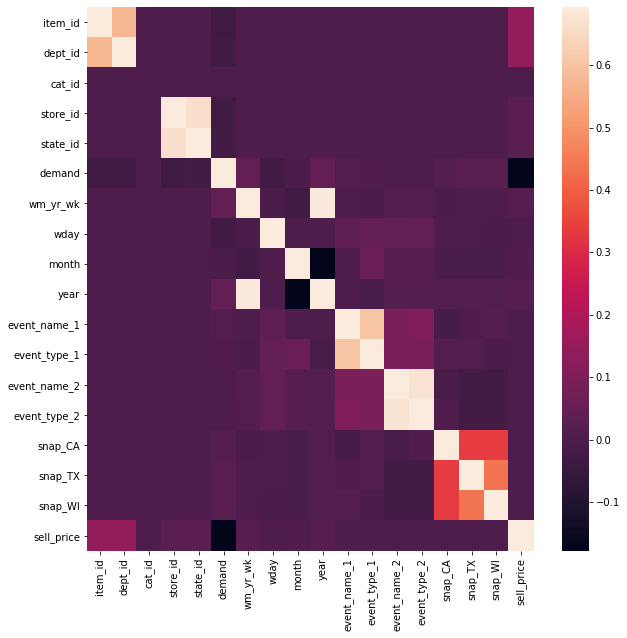

In [49]:
import seaborn as sns
import math 

plt.figure(figsize=(10,10))
sns.heatmap(np.log(data.corr().fillna(0)+1))


In [25]:
import plotly.express as px
import plotly.graph_objects as go
fig_c = go.Figure()
state_color = {1:'red', 100:'blue'}
for item_id in [1, 100]: 
    fig_c = go.Figure()
    to_plot = data[(data['item_id']==item_id) & (data['date'] <'2011-09-01')]
    to_plot = to_plot.groupby(['date']).sum()
    to_plot = to_plot.reset_index()
    fig_c.add_trace(go.Scatter(x=to_plot['date'], y=to_plot['demand'], line_color=state_color[item_id]))
    fig_c.show()    

In [26]:
features = ['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'year', 'month', 'week', 'day', 'dayofweek', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 
            'snap_CA', 'snap_TX', 'snap_WI', 'sell_price', 'lag_t28', 'lag_t29', 'lag_t30', 'rolling_mean_t7', 'rolling_std_t7', 'rolling_mean_t30', 'rolling_mean_t90', 
            'rolling_mean_t180', 'rolling_std_t30', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30', 'rolling_skew_t30', 'rolling_kurt_t30']

In [27]:
def simple_fe(data):
    
    # rolling demand features
    data['lag_t28'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28))
    data['lag_t29'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(29))
    data['lag_t30'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(30))
    data['rolling_mean_t7'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(7).mean())
    data['rolling_std_t7'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(7).std())
    data['rolling_mean_t30'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(30).mean())
    data['rolling_mean_t90'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(90).mean())
    data['rolling_mean_t180'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(180).mean())
    data['rolling_std_t30'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(30).std())
    data['rolling_skew_t30'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(30).skew())
    data['rolling_kurt_t30'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(30).kurt())
    
    
    # price features
    data['lag_price_t1'] = data.groupby(['id'])['sell_price'].transform(lambda x: x.shift(1))
    data['price_change_t1'] = (data['lag_price_t1'] - data['sell_price']) / (data['lag_price_t1'])
    data['rolling_price_max_t365'] = data.groupby(['id'])['sell_price'].transform(lambda x: x.shift(1).rolling(365).max())
    data['price_change_t365'] = (data['rolling_price_max_t365'] - data['sell_price']) / (data['rolling_price_max_t365'])
    data['rolling_price_std_t7'] = data.groupby(['id'])['sell_price'].transform(lambda x: x.rolling(7).std())
    data['rolling_price_std_t30'] = data.groupby(['id'])['sell_price'].transform(lambda x: x.rolling(30).std())
    data.drop(['rolling_price_max_t365', 'lag_price_t1'], inplace = True, axis = 1)
    
    # time features
    data['date'] = pd.to_datetime(data['date'])
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['week'] = data['date'].dt.week
    data['day'] = data['date'].dt.day
    data['dayofweek'] = data['date'].dt.dayofweek
    
    
    return data

In [28]:
def transform_train_and_eval(data):
    data = transform(data)
    data = simple_fe(data)
    # reduce memory for new features so we can train
    data = reduce_mem_usage(data)
    x_train = data[data['date'] <= '2016-03-27']
    x_train = x_train[['demand']+features]
    x_val = data[(data['date'] > '2016-03-27') & (data['date'] <= '2016-04-24')]
    x_val = x_val[['demand']+features]

    return x_train, x_val

    
train, validation = transform_train_and_eval(data)

Mem. usage decreased to 481.64 Mb (64.8% reduction)


In [29]:
train.tail()

,demand,item_id,dept_id,cat_id,store_id,state_id,year,month,week,day,dayofweek,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,lag_t28,lag_t29,lag_t30,rolling_mean_t7,rolling_std_t7,rolling_mean_t30,rolling_mean_t90,rolling_mean_t180,rolling_std_t30,price_change_t1,price_change_t365,rolling_price_std_t7,rolling_price_std_t30,rolling_skew_t30,rolling_kurt_t30
5654995,0,218,1,0,9,2,2016,3,12,27,6,25,0,4,2,0,0,0,2.179688,0.0,0.0,0.0,0.000000,0.000000,0.733398,3.156250,2.533203,1.760742,0.0,0.000000,0.0,0.000000e+00,2.306641,4.226562
5654996,2,219,1,0,9,2,2016,3,12,27,6,25,0,4,2,0,0,0,2.380859,2.0,4.0,0.0,2.000000,1.527344,2.033203,1.921875,1.683594,1.564453,0.0,0.000000,0.0,5.960464e-08,1.041016,2.076172
5654997,0,220,1,0,9,2,2016,3,12,27,6,25,0,4,2,0,0,0,5.980469,0.0,1.0,1.0,0.285645,0.488037,1.266602,1.677734,1.433594,1.285156,0.0,0.000000,0.0,0.000000e+00,0.716797,-0.572754
5654998,1,221,1,0,9,2,2016,3,12,27,6,25,0,4,2,0,0,0,6.718750,0.0,4.0,0.0,1.286133,1.496094,1.333008,1.688477,1.311523,1.322266,0.0,0.037506,0.0,0.000000e+00,0.579590,-0.897461
5654999,0,222,1,0,9,2,2016,3,12,27,6,25,0,4,2,0,0,0,2.970703,1.0,1.0,0.0,0.285645,0.488037,0.700195,0.455566,0.416748,0.876953,0.0,0.000000,0.0,0.000000e+00,0.979492,-0.025085


In [50]:
import sagemaker
import boto3
import os 

local_train_file = "train.csv"
local_test_file = "test.csv"
local_autopilot_file = "autopilot_train.csv"
train.to_csv(local_autopilot_file, index=False)
train.to_csv(local_train_file, header=False, index=False)
validation.to_csv(local_test_file, header=False, index=False)

bucket = sagemaker.Session().default_bucket()
prefix = 'demand-prediction'

boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'autopilot/input', local_autopilot_file)).upload_file(local_autopilot_file)
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', local_train_file)).upload_file(local_train_file)
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation', local_test_file)).upload_file(local_test_file)
